In [ ]:
# Planning is working backwards from a goal (*see bottom of cell)

# AUTOMATION! 
# i. GET DATA
#     1) find devices on network
#     2) physical (linux-metrics, lm-sensors)
#     3) network (packets)
#         a) local (my computer and router)
#         b) public (needs wireless network card) (all computers on network)

# ii. USE DATA
#     1) plots
#     2) predictions
    
# still to come ...

# iii. NETWORK FAULT PREDICTION
#     1) identify
#     2) provide solution
#     3) Avoid endless data collection of network (only collect data when under a threshold)
# (*start here)

In [5]:
from scapy.all import ARP, Ether, srp

import pandas as pd
import numpy as np

# need to scp the new text file back to this device
from scp import SCPClient 
import sys
import os

from paramiko import SSHClient
from scp import SCPClient

import os

import paramiko
# To allow connection without having to accept the host connection
policy = paramiko.client.AutoAddPolicy

In [6]:
# sweeps all mac addresss and ip
def ip_sweep() -> {str,str}:
    target_ip = "192.168.1.1/24"
    arp = ARP(pdst=target_ip)
    ether = Ether(dst="ff:ff:ff:ff:ff:ff")
    packet = ether / arp
    result = srp(packet, timeout=3)[0]
    return {rec.hwsrc.lower(): rec.psrc for _, rec in result}
mac_to_ip = ip_sweep()

Begin emission:
Finished sending 256 packets.

Received 1802 packets, got 16 answers, remaining 240 packets


In [7]:
mac_to_ip

{'f4:17:b8:2d:67:28': '192.168.1.67',
 '00:17:88:a3:0d:3e': '192.168.1.78',
 '94:9f:3e:d6:52:90': '192.168.1.82',
 'a0:8c:fd:bc:57:ac': '192.168.1.86',
 '40:bc:60:8b:62:09': '192.168.1.70',
 '34:f6:4b:4d:76:dc': '192.168.1.71',
 '28:ff:3c:97:d0:89': '192.168.1.81',
 '98:01:a7:a0:1f:43': '192.168.1.85',
 '28:ff:3c:b4:b7:f2': '192.168.1.88',
 '78:28:ca:c7:e2:f4': '192.168.1.139',
 '28:ff:3c:b5:13:a9': '192.168.1.180',
 'd8:e0:e1:0f:00:d2': '192.168.1.218',
 'f8:d0:27:89:54:66': '192.168.1.240',
 'c8:52:61:79:d1:a2': '192.168.1.251',
 'c8:52:61:79:d1:a0': '192.168.1.254',
 '28:3a:4d:87:af:47': '192.168.1.231'}

In [8]:
# our know logins
mac_and_ip = {'b8:27:eb:09:26:95': '192.168.1.226'}


mac_to_usr = {'b8:27:eb:09:26:95': "root"}


mac_to_pwd = {'b8:27:eb:09:26:95': "toor"}

In [9]:
# Iterate over all our found mac, ip connections and SSH into
# the clients
for mac, ip in mac_and_ip.items():
    # Assume that to be given
    pwd = mac_to_pwd[mac]
    print(pwd)

toor


In [10]:
# runs the commands over ssh
def exec_blocking(cmd, client):
    print(f"Executing {cmd}")
    _, stdout_, stderr_ = client.exec_command(cmd)
    status = stdout_.channel.recv_exit_status()
    print(f"STATUS {status}")
    for line in stdout_.readlines():
        print(line)
    if status != 0:
        errors = "ERROR with lm-sensors"
        
        #raise Exception(f"{cmd} failed with {errors}")

In [26]:
# GET PHYSICAL FEATURES OF DEVICES ON NETWORK
# TEMP, NUM PROCESSES RUNNING, CPU UTILIZATION ETC.

# Iterate over all our found mac, ip connections and SSH into
# # the clients
for mac, ip in mac_and_ip.items():
    # Assume that to be given
    pwd = mac_to_pwd[mac]
    usr = mac_to_usr[mac]
    
    with paramiko.SSHClient() as client:
            client.set_missing_host_key_policy(policy)
            try:
                client.connect(ip, username=usr, password= pwd)
            except paramiko.ssh_exception.NoValidConnectionsError:
                print("Connection failed")
#             # get the new lm-sensors file
#             command = "sensors > Desktop/python_sensors_test.txt".format(ip)
#             # execute the command above
            cmd = "python lm_metrics.py"
            exec_blocking(cmd, client)
#             cmd = 'python3 s.py'
#             exec_blocking(cmd, client)
            # open secure copy protocol
            scp = SCPClient(client.get_transport()) 
            # get the file of the current temps
#             scp.put("lm_metrics.py", "lm_metrics.py")
#             scp.put("s.py", "s.py")
#             scp.get("Desktop/python_sensors{}.txt".format(ip))
            scp.get("Desktop/metric_test.txt")
#             os.rename("metric_test.txt", "metric_{}_{}.txt".format(ip, time.strftime("%Y%m%d-%H%M%S")))
            scp.close()
            client.close()

Executing python lm_metrics.py
STATUS 1


In [12]:
# !pip install scapy

In [13]:
from scapy.all import *

In [27]:
test_type = "test"
amount = 500
sniff(count=amount)

<Sniffed: TCP:16 UDP:482 ICMP:0 Other:2>

In [28]:
packets = _

In [29]:
packets.nsummary()

0000 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0001 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0002 Ether / IP / UDP 192.168.1.199:60365 > 18.220.61.138:8801 / Raw
0003 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60368 / Raw
0004 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0005 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0006 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0007 Ether / IP / UDP 192.168.1.199:60368 > 18.220.61.138:8801 / Raw
0008 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60365 / Raw
0009 Ether / IP / UDP 18.220.61.138:8801 > 192.168.1.199:60368 / Raw
0010 Ether / IP / UDP 192.168.1.199:60368 > 18.220.61.138:8801 / Raw
0011 Ether / IP / UDP 192.168.1.199:60368 > 18.220.61.138:8801 / Raw
0012 Ether / IP / UDP 192.168.1.199:60368 > 18.220.61.138:8801 / Raw
0013 Ether / IP / UDP 192.168.1.199:60365 > 18.220.61.138:8801 / Raw
0014 Ether / IP / UDP 18.220.61.13

In [30]:
filename = 'sniffed_' + test_type + '.pcap'
wrpcap(filename, packets)

In [37]:
csv_name = 'p2c_' + test_type + '.csv'
os.system('python pcap2csv.py --pcap ' + filename + ' --csv ' + csv_name)


0

In [35]:
file_name = "p2c_" + 'test' + ".csv"
df = pd.read_csv(file_name, sep='|', header=None)
df.columns = ['packet_number', 'time', 'protocol', 'info', 'source', 'destination', 'length', 'packets']
print(df.shape)
df.head()


(445, 8)


,packet_number,time,protocol,info,source,destination,length,packets
0,2,0.113210,SSDP(UDP),M-SEARCH * HTTP/1.1,192.168.1.69:50221,239.255.255.250:1900,167,4d2d534541524348202a20485454502f312e310d0a484f...
1,4,0.383135,SSDP(UDP),M-SEARCH * HTTP/1.1,192.168.1.69:50221,239.255.255.250:1900,167,4d2d534541524348202a20485454502f312e310d0a484f...
2,5,0.658776,TLSv1.2(TCP),Application Data,192.168.1.212:61663,52.202.62.248:443,89,170303001e405c84f464092d0c54c3df650b7ba7a31720...
3,6,0.712037,TLSv1.2(TCP),Application Data,52.202.62.248:443,192.168.1.212:61663,85,170303001a52a546b880c2540bcdabb85285ae90092342...
4,7,0.753498,TCP(TCP),61663 \xe2\x86\x92 443 [ACK] Seq=36 Ack=32 Win...,192.168.1.212:61663,52.202.62.248:443,54,NaN


In [34]:
df['source'].unique()

array(['192.168.1.69:50221', '192.168.1.212:61663', '52.202.62.248:443',
       '192.168.1.212:61641', '3.208.72.73:443', '192.168.1.88:5353',
       '192.168.1.212:53443', '172.217.9.131:443', '192.168.1.82:46433',
       '192.168.1.82:59097', '192.168.1.212:62499', '192.168.1.254:53',
       '192.168.1.212:62500', '172.217.9.14:443', '192.168.1.212:61660',
       '18.211.118.21:443', '173.194.67.189:443', '192.168.1.212:52297',
       '192.168.1.69:47263', '192.168.1.212:61796', '13.107.42.12:443',
       '192.168.1.67:53616', '192.168.1.212:61789', '192.168.1.212:61790',
       '192.168.1.212:61797', '192.168.1.212:61798', '52.114.6.47:443',
       '52.230.222.68:443', '192.168.1.212:49426', '192.168.1.212:61639',
       '192.168.1.212:52267', '192.168.1.139:60476', '192.168.1.69:58212',
       '192.168.1.212:61656', '172.217.195.188:5228', '192.168.1.69:5353'],
      dtype=object)

In [16]:
def splitIP(df, column):
    source_split = df[column].str.split(".", expand = True)
#     print(source_split.head())
    source_split.columns = ['{}_0'.format(column), '{}_1'.format(column), '{}_2'.format(column), '{}_3'.format(column)]
    s3_split = source_split['{}_3'.format(column)].str.split(":", expand=True)
    source_split['{}_3'.format(column)] = s3_split[0]
    source_split['{}_port'.format(column)] = s3_split[1]
    for col in source_split.columns:
        df[col] = source_split[col]
    df.drop(columns =[column], inplace = True)
    return df
temp = splitIP(df, 'source')

In [17]:
temp.head()

,packet_number,time,protocol,info,destination,length,packets,source_0,source_1,source_2,source_3,source_port
0,2,0.113210,SSDP(UDP),M-SEARCH * HTTP/1.1,239.255.255.250:1900,167,4d2d534541524348202a20485454502f312e310d0a484f...,192,168,1,69,50221
1,4,0.383135,SSDP(UDP),M-SEARCH * HTTP/1.1,239.255.255.250:1900,167,4d2d534541524348202a20485454502f312e310d0a484f...,192,168,1,69,50221
2,5,0.658776,TLSv1.2(TCP),Application Data,52.202.62.248:443,89,170303001e405c84f464092d0c54c3df650b7ba7a31720...,192,168,1,212,61663
3,6,0.712037,TLSv1.2(TCP),Application Data,192.168.1.212:61663,85,170303001a52a546b880c2540bcdabb85285ae90092342...,52,202,62,248,443
4,7,0.753498,TCP(TCP),61663 \xe2\x86\x92 443 [ACK] Seq=36 Ack=32 Win...,52.202.62.248:443,54,NaN,192,168,1,212,61663


In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [19]:
files = ['clean_youtube', 'distance', 'wifi_off_on', 'airplane_mode', 'zoom']

# return a dictionary of the various dataframes 
def dictOfDataFrames(listOfFiles):
    result = {}
    for file_index in range(len(listOfFiles)):
        file_name = "p2c_" + listOfFiles[file_index] + ".csv"
        df = pd.read_csv(file_name, sep='|', header=None)
        df.columns = ['packet_number', 'time', 'protocol', 'info', 'source', 'destination', 'length', 'packets']
        df = splitIP(df, 'source')
        df = splitIP(df, 'destination')
        df['type'] = file_index
        result[listOfFiles[file_index]] = df
    return result

df_dict= dictOfDataFrames(files)

In [21]:
df_dict['distance'].head()

,packet_number,time,protocol,info,length,packets,source_0,source_1,source_2,source_3,source_port,destination_0,destination_1,destination_2,destination_3,destination_port,type
0,2,0.050775,UDP(UDP),63282 \xe2\x86\x92 443 Len=33,75,5c4f8be752d1405c37008e9d3bb86a3d6a676e66fd5bea...,192,168,1,244,63282,172,253,127,189,443,1
1,3,0.092562,UDP(UDP),443 \xe2\x86\x92 63282 Len=25,67,559cac4ed44df9d076bfb3abd2d20499be77b6362e4168...,172,253,127,189,443,192,168,1,244,63282,1
2,5,2.240931,UDP(UDP),51277 \xe2\x86\x92 443 Len=1350,1392,4c916d226e366832909bfdd78c0a67b0df12cf113877f5...,192,168,1,244,51277,172,217,6,174,443,1
3,6,2.241019,UDP(UDP),51277 \xe2\x86\x92 443 Len=122,164,46916d226e36683290b5b45b8bfd07bd642949119b1560...,192,168,1,244,51277,172,217,6,174,443,1
4,7,2.248436,DNS(UDP),Standard query 0x25de A wpad.attlocal.net,77,25de010000010000000000000477706164086174746c6f...,192,168,1,244,59521,192,168,1,254,53,1


In [22]:
def makePlot(df_dict, x_axis, y_axis):
    for key in df_dict.keys():
        df = df_dict[key]
        plt.scatter(df[x_axis][0:500], df[y_axis][0:500])
    plt.legend(df_dict.keys())
    plt.ylabel(y_axis)
    plt.xlabel(x_axis)
    return plt


# plt.scatter(n.index.values, n.length)
# plt.scatter(w.index.values, w.length)

<IPython.core.display.Javascript object>


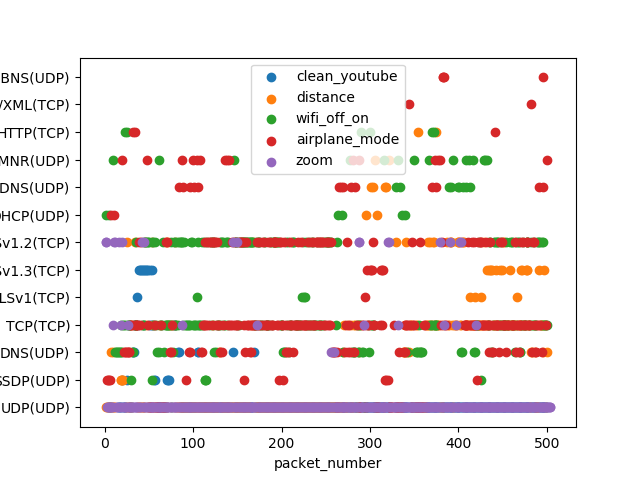

<module 'matplotlib.pyplot' from 'C:\\Users\\carna\\Anaconda3\\envs\\condaEnv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [40]:
makePlot(df_dict, 'packet_number', 'protocol')

<IPython.core.display.Javascript object>


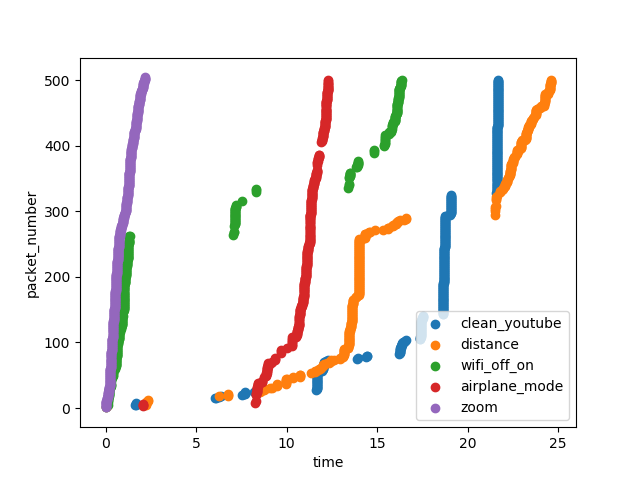

<module 'matplotlib.pyplot' from 'C:\\Users\\carna\\Anaconda3\\envs\\condaEnv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [41]:
makePlot(df_dict, 'time', 'packet_number')

In [47]:
cols = df_dict['distance'].columns.values
features = cols[cols != ['protocol']]
features = features[features != ['info']]
features = features[features != ['packets']]
features = features[features != ['type']]

In [48]:
df_dict['distance'].head()

,packet_number,time,protocol,info,length,packets,source_0,source_1,source_2,source_3,source_port,destination_0,destination_1,destination_2,destination_3,destination_port,type
0,2,0.050775,UDP(UDP),63282 \xe2\x86\x92 443 Len=33,75,5c4f8be752d1405c37008e9d3bb86a3d6a676e66fd5bea...,192,168,1,244,63282,172,253,127,189,443,1
1,3,0.092562,UDP(UDP),443 \xe2\x86\x92 63282 Len=25,67,559cac4ed44df9d076bfb3abd2d20499be77b6362e4168...,172,253,127,189,443,192,168,1,244,63282,1
2,5,2.240931,UDP(UDP),51277 \xe2\x86\x92 443 Len=1350,1392,4c916d226e366832909bfdd78c0a67b0df12cf113877f5...,192,168,1,244,51277,172,217,6,174,443,1
3,6,2.241019,UDP(UDP),51277 \xe2\x86\x92 443 Len=122,164,46916d226e36683290b5b45b8bfd07bd642949119b1560...,192,168,1,244,51277,172,217,6,174,443,1
4,7,2.248436,DNS(UDP),Standard query 0x25de A wpad.attlocal.net,77,25de010000010000000000000477706164086174746c6f...,192,168,1,244,59521,192,168,1,254,53,1


In [49]:
def makeTotalArray(df_dict, batch_size, features):
    x = []
    y = []
    for key in df_dict.keys():
        df = df_dict[key]
        print(key + " initial size: " + str(len(df)))
        df = df.fillna(0)
#         df = df.dropna(axis=0)
#         print("after drop nans: " + str(len(df)))
        winIndex = 0;
        df = df[0:1000]
        while winIndex < (len(df) - batch_size):
            x_window = df.iloc[winIndex: winIndex + batch_size, :][features]
            y_window = df.iloc[winIndex: winIndex + batch_size, :]['type']
            if len(x_window) == batch_size and len(y_window) == batch_size:
                x.append(x_window.values)
                y.append(y_window.values[0])
            winIndex+= batch_size
    return np.array(x), np.array(y)
    

In [50]:
x_ar, y_ar = makeTotalArray(df_dict, 25, features)

clean_youtube initial size: 475
distance initial size: 436
wifi_off_on initial size: 383
airplane_mode initial size: 405
zoom initial size: 49258


In [51]:
x_ar.shape

(105, 25, 13)

In [52]:
# !pip install keras-self-attention

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

from sklearn.utils import shuffle
import tensorflow as tf

from keras_self_attention import SeqSelfAttention



Using TensorFlow backend.


In [53]:
# suffle the data
x_ar = shuffle(x_ar, random_state=0)
y_ar = shuffle(y_ar, random_state=0)
x_train = x_ar[0:80]

y_ar = tf.keras.utils.to_categorical(y_ar, dtype='float32')
y_ar = shuffle(y_ar, random_state=0)
y_train = y_ar[0:80]
x_train.shape

(80, 25, 13)

In [54]:
# y_train = np.reshape(y_train, (50, 1, 4))
y_train.shape

(80, 5)

In [55]:
x_val = x_ar[80:]
y_val = y_ar[80:]

In [56]:

data_dim = 13
timesteps = 25
num_classes = 5

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(128, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(Dropout(0.2))
# model.add(LSTM(128, return_sequences=True)) # returns a sequence of vectors of dimension 32
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 128)           72704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 128)           0         
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, 25, 128)           8257      
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 213,190
Trainable params: 213,190
Non-trainable params: 0
________________________________________________

In [57]:
model.fit(x_train, y_train,
          batch_size=10, epochs=250,
          validation_data=(x_val, y_val))

Train on 80 samples, validate on 25 samples
Epoch 1/250
80/80 [==============================] - 2s 26ms/step - loss: 1.7367 - accuracy: 0.2750 - val_loss: 1.5062 - val_accuracy: 0.4800
Epoch 2/250
80/80 [==============================] - 0s 5ms/step - loss: 1.6386 - accuracy: 0.2875 - val_loss: 1.4570 - val_accuracy: 0.4800
Epoch 3/250
80/80 [==============================] - 0s 5ms/step - loss: 1.5738 - accuracy: 0.3375 - val_loss: 1.4481 - val_accuracy: 0.4800
Epoch 4/250
80/80 [==============================] - 0s 5ms/step - loss: 1.5562 - accuracy: 0.3125 - val_loss: 1.4615 - val_accuracy: 0.4800
Epoch 5/250
80/80 [==============================] - 0s 5ms/step - loss: 1.5425 - accuracy: 0.3250 - val_loss: 1.4520 - val_accuracy: 0.4400
Epoch 6/250
80/80 [==============================] - 0s 5ms/step - loss: 1.5314 - accuracy: 0.2625 - val_loss: 1.4456 - val_accuracy: 0.4400
Epoch 7/250
80/80 [==============================] - 0s 4ms/step - loss: 1.5399 - accuracy: 0.3375 - val_loss